In [1]:
## Multi Layer Perceptron (Feedforward)

In [2]:
#Reading the data set
import pandas as pd 
import numpy as np

data = pd.read_csv('irisdata.csv',header=None)

data[5] = np.where(data[4]=='Iris-versicolor', '1','0')
data[4] = data[4].str.replace('Iris-setosa','0')
data[4] = data[4].str.replace('Iris-versicolor','0')
data[4] = data[4].str.replace('Iris-virginica','1')
data[4] = data[4].astype('int64')

array_data = np.array(data)


In [3]:
#Initialisations of variables
epoch = 100

alpha = 0.1

theta_1 = np.array([0.2,0.3,0.3,0.2])
theta_2 = np.array([0.2,0.3,0.3,0.2])

bias_1 = 0.3
bias_2 = 0.3
d_bias1 = 0
d_bias2 = 0

h = 0
array_dtheta1 = np.empty(4)
array_dtheta2 = np.empty(4)
total_error = np.zeros(epoch)

total_error_train = np.zeros(epoch)
total_error_val = np.zeros(epoch)

local_error_train = 0
local_error_val = 0

total_error_train1 = np.zeros(epoch)
total_error_val1 = np.zeros(epoch)

total_error_train2 = np.zeros(epoch)
total_error_val2 = np.zeros(epoch)

total_error_train3 = np.zeros(epoch)
total_error_val3 = np.zeros(epoch)

total_error_train4 = np.zeros(epoch)
total_error_val4 = np.zeros(epoch)

total_error_train5 = np.zeros(epoch)
total_error_val5 = np.zeros(epoch)

In [4]:
#Dividing the dataset into k folds, k = 5

fold_11 = pd.read_csv('irisdata.csv', header=None, nrows=10)
fold_12 = pd.read_csv('irisdata.csv', header=None, skiprows=50, nrows=10)
fold_13 = pd.read_csv('irisdata.csv', header=None, skiprows=100, nrows=10)
fold1 = pd.concat([fold_11,fold_12,fold_13])
fold1[5] = np.where(fold1[4]=='Iris-versicolor', '1','0')
fold1[4] = fold1[4].str.replace('Iris-setosa','0')
fold1[4] = fold1[4].str.replace('Iris-versicolor','0')
fold1[4] = fold1[4].str.replace('Iris-virginica','1')
fold1[4] = fold1[4].astype('int64')
fold1[5] = fold1[5].astype('int64')

fold_21 = pd.read_csv('irisdata.csv', header=None, skiprows=10,nrows=10)
fold_22 = pd.read_csv('irisdata.csv', header=None, skiprows=60, nrows=10)
fold_23 = pd.read_csv('irisdata.csv', header=None, skiprows=110, nrows=10)
fold2 = pd.concat([fold_21,fold_22,fold_23])
fold2[5] = np.where(fold2[4]=='Iris-versicolor', '1','0')
fold2[4] = fold2[4].str.replace('Iris-setosa','0')
fold2[4] = fold2[4].str.replace('Iris-versicolor','0')
fold2[4] = fold2[4].str.replace('Iris-virginica','1')
fold2[4] = fold2[4].astype('int64')
fold2[5] = fold2[5].astype('int64')

fold_31 = pd.read_csv('irisdata.csv', header=None, skiprows=20,nrows=10)
fold_32 = pd.read_csv('irisdata.csv', header=None, skiprows=70, nrows=10)
fold_33 = pd.read_csv('irisdata.csv', header=None, skiprows=120, nrows=10)
fold3 = pd.concat([fold_31,fold_32,fold_33])
fold3[5] = np.where(fold3[4]=='Iris-versicolor', '1','0')
fold3[4] = fold3[4].str.replace('Iris-setosa','0')
fold3[4] = fold3[4].str.replace('Iris-versicolor','0')
fold3[4] = fold3[4].str.replace('Iris-virginica','1')
fold3[4] = fold3[4].astype('int64')
fold3[5] = fold3[5].astype('int64')

fold_41 = pd.read_csv('irisdata.csv', header=None, skiprows=30,nrows=10)
fold_42 = pd.read_csv('irisdata.csv', header=None, skiprows=80, nrows=10)
fold_43 = pd.read_csv('irisdata.csv', header=None, skiprows=130, nrows=10)
fold4 = pd.concat([fold_41,fold_42,fold_43])
fold4[5] = np.where(fold4[4]=='Iris-versicolor', '1','0')
fold4[4] = fold4[4].str.replace('Iris-setosa','0')
fold4[4] = fold4[4].str.replace('Iris-versicolor','0')
fold4[4] = fold4[4].str.replace('Iris-virginica','1')
fold4[4] = fold4[4].astype('int64')
fold4[5] = fold4[5].astype('int64')

fold_51 = pd.read_csv('irisdata.csv', header=None, skiprows=40,nrows=10)
fold_52 = pd.read_csv('irisdata.csv', header=None, skiprows=90, nrows=10)
fold_53 = pd.read_csv('irisdata.csv', header=None, skiprows=140, nrows=10)
fold5 = pd.concat([fold_51,fold_52,fold_53])
fold5[5] = np.where(fold5[4]=='Iris-versicolor', '1','0')
fold5[4] = fold5[4].str.replace('Iris-setosa','0')
fold5[4] = fold5[4].str.replace('Iris-versicolor','0')
fold5[4] = fold5[4].str.replace('Iris-virginica','1')
fold5[4] = fold5[4].astype('int64')
fold5[5] = fold5[5].astype('int64')

In [5]:
#Fold5 as validation
train1 = pd.concat([fold1,fold2,fold3,fold4])
val1 = fold5

#Fold4 as validation
train2 = pd.concat([fold1,fold2,fold3,fold5])
val2 = fold4

#Fold3 as validation
train3 = pd.concat([fold1,fold2,fold4,fold5])
val3 = fold3

#Fold2 as validation
train4 = pd.concat([fold1,fold3,fold4,fold5])
val4 = fold2

#Fold1 as validation
train5 = pd.concat([fold2,fold3,fold4,fold5])
val5 = fold1

In [6]:
#Defining functions
import math as mt

def h(x,theta,bias,n):
    return np.dot(x.iloc[n,:4],np.transpose(theta)) + bias

def sigmoid(h):
    return 1/(1+mt.exp(-h))

def error(data,sigmoid,n,x):
    return (sigmoid-data.iloc[n,x])**2

def prediction(sigmoid):
    if sigmoid >= 0.5:
        prediction = 1
        return prediction
    else:
        prediction = 0
        return prediction

def d_theta(sigmoid,fact,x_array,i):
    return 2*(sigmoid-fact)*(1-sigmoid)*sigmoid*x_array[i]

def d_bias(sigmoid,fact):
    return 2*(sigmoid-fact)*(1-sigmoid)*sigmoid

def new_theta(theta,alpha,d_theta,i):
    return theta[i]-(alpha*d_theta[i])

def new_bias(bias,alpha,d_bias):
    return bias-(alpha*d_bias)

In [7]:
# 4 input nodes, 2 hidden nodes, 2 output nodes

In [8]:
#Calculations
for n in range(epoch):
    
    """Fold5 as validation"""
    temp1_theta1 = np.zeros(4)
    temp1_bias1 = 0
    temp1_theta2 = np.zeros(4)
    temp1_bias2 = 0
    
    for i in range(len(train1)):

        x_array = np.array(train1.iloc[i,:4]) 

        fact1 = train1.iloc[i,4]
        fact2 = train1.iloc[i,5]

        h_value1 = h(train1,theta_1,bias_1,i)
        h_value2 = h(train1,theta_2,bias_2,i)

        sigmoid_value1 = sigmoid(h_value1)
        sigmoid_value2 = sigmoid(h_value2)

        error_value1 = error(train1,sigmoid_value1,i,4)
        error_value2 = error(train1,sigmoid_value2,i,5)
        error_value = (error_value1 + error_value2)/2

        local_error_train = local_error_train + error_value
            
        prediction_value1 = prediction(sigmoid_value1)
        prediction_value2 = prediction(sigmoid_value2)
        
        for j in range(len(x_array)):
            array_dtheta1[j] = d_theta(sigmoid_value1,fact1,x_array,j)
            array_dtheta2[j] = d_theta(sigmoid_value2,fact2,x_array,j)

        d_bias_value1 = d_bias(sigmoid_value1,fact1)
        d_bias_value2 = d_bias(sigmoid_value2,fact2)
        
        for j in range(len(theta_1)):
            theta_1[j] = new_theta(theta_1,alpha,array_dtheta1,j)
        temp1_theta1 = theta_1
        for j in range(len(theta_2)):
            theta_2[j] = new_theta(theta_2,alpha,array_dtheta2,j)
        temp1_theta2 = theta_2
        
        new_bias_value1 = new_bias(bias_1,alpha,d_bias_value1)
        bias_1 = new_bias_value1
        temp1_bias1 = bias_1
        
        new_bias_value2 = new_bias(bias_2,alpha,d_bias_value2)
        bias_2 = new_bias_value2
        temp1_bias2 = bias_2
        
    total_error_train1[n] = ((local_error_train) / (len(train1)))
    local_error_train = 0
    
    for i in range(len(val1)):
    
        x_array = np.array(val1.iloc[i,:4])
        
        fact1 = val1.iloc[i,4]
        fact2 = val1.iloc[i,5]
        
        h_value1 = h(val1,temp1_theta1,temp1_bias1,i)
        h_value2 = h(val2,temp1_theta2,temp1_bias2,i)
        
        sigmoid_value1 = sigmoid(h_value1)
        sigmoid_value2 = sigmoid(h_value2)
        
        error_value1 = error(val1,sigmoid_value1,i,4)
        error_value2 = error(val1,sigmoid_value2,i,5)
        error_value = (error_value1 + error_value2)/2
        
        local_error_val = local_error_val + error_value
        
        prediction_value1 = prediction(sigmoid_value1)
        prediction_value2 = prediction(sigmoid_value2)
        
    total_error_val1[n] = ((local_error_val) / (len(val1)))
    local_error_val = 0
    
    """Fold4 as validation"""
    temp2_theta1 = np.zeros(4)
    temp2_bias1 = 0
    temp2_theta2 = np.zeros(4)
    temp2_bias2 = 0
    
    for i in range(len(train2)):

        x_array = np.array(train2.iloc[i,:4]) 

        fact1 = train2.iloc[i,4]
        fact2 = train2.iloc[i,5]

        h_value1 = h(train2,theta_1,bias_1,i)
        h_value2 = h(train2,theta_2,bias_2,i)

        sigmoid_value1 = sigmoid(h_value1)
        sigmoid_value2 = sigmoid(h_value2)

        error_value1 = error(train2,sigmoid_value1,i,4)
        error_value2 = error(train2,sigmoid_value2,i,5)
        error_value = (error_value1 + error_value2)/2

        local_error_train = local_error_train + error_value
            
        prediction_value1 = prediction(sigmoid_value1)
        prediction_value2 = prediction(sigmoid_value2)
        
        for j in range(len(x_array)):
            array_dtheta1[j] = d_theta(sigmoid_value1,fact1,x_array,j)
            array_dtheta2[j] = d_theta(sigmoid_value2,fact2,x_array,j)

        d_bias_value1 = d_bias(sigmoid_value1,fact1)
        d_bias_value2 = d_bias(sigmoid_value2,fact2)
        
        for j in range(len(theta_1)):
            theta_1[j] = new_theta(theta_1,alpha,array_dtheta1,j)
        temp2_theta1 = theta_1
        for j in range(len(theta_2)):
            theta_2[j] = new_theta(theta_2,alpha,array_dtheta2,j)
        temp2_theta2 = theta_2
        
        new_bias_value1 = new_bias(bias_1,alpha,d_bias_value1)
        bias_1 = new_bias_value1
        temp2_bias1 = bias_1
        
        new_bias_value2 = new_bias(bias_2,alpha,d_bias_value2)
        bias_2 = new_bias_value2
        temp2_bias2 = bias_2
        
    total_error_train2[n] = ((local_error_train) / (len(train2)))
    local_error_train = 0
    
    for i in range(len(val2)):
    
        x_array = np.array(val2.iloc[i,:4])
        
        fact1 = val2.iloc[i,4]
        fact2 = val2.iloc[i,5]
        
        h_value1 = h(val2,temp2_theta1,temp2_bias1,i)
        h_value2 = h(val2,temp2_theta2,temp2_bias2,i)
        
        sigmoid_value1 = sigmoid(h_value1)
        sigmoid_value2 = sigmoid(h_value2)
        
        error_value1 = error(val2,sigmoid_value1,i,4)
        error_value2 = error(val2,sigmoid_value2,i,5)
        error_value = (error_value1 + error_value2)/2
        
        local_error_val = local_error_val + error_value
        
        prediction_value1 = prediction(sigmoid_value1)
        prediction_value2 = prediction(sigmoid_value2)
        
    total_error_val2[n] = ((local_error_val) / (len(val2)))
    local_error_val = 0
    
    """Fold3 as validation"""
    temp3_theta1 = np.zeros(4)
    temp3_bias1 = 0
    temp3_theta2 = np.zeros(4)
    temp3_bias2 = 0
    
    for i in range(len(train3)):

        x_array = np.array(train3.iloc[i,:4]) 

        fact1 = train3.iloc[i,4]
        fact2 = train3.iloc[i,5]

        h_value1 = h(train3,theta_1,bias_1,i)
        h_value2 = h(train3,theta_2,bias_2,i)

        sigmoid_value1 = sigmoid(h_value1)
        sigmoid_value2 = sigmoid(h_value2)

        error_value1 = error(train3,sigmoid_value1,i,4)
        error_value2 = error(train3,sigmoid_value2,i,5)
        error_value = (error_value1 + error_value2)/2

        local_error_train = local_error_train + error_value
            
        prediction_value1 = prediction(sigmoid_value1)
        prediction_value2 = prediction(sigmoid_value2)
        
        for j in range(len(x_array)):
            array_dtheta1[j] = d_theta(sigmoid_value1,fact1,x_array,j)
            array_dtheta2[j] = d_theta(sigmoid_value2,fact2,x_array,j)

        d_bias_value1 = d_bias(sigmoid_value1,fact1)
        d_bias_value2 = d_bias(sigmoid_value2,fact2)
        
        for j in range(len(theta_1)):
            theta_1[j] = new_theta(theta_1,alpha,array_dtheta1,j)
        temp3_theta1 = theta_1
        for j in range(len(theta_2)):
            theta_2[j] = new_theta(theta_2,alpha,array_dtheta2,j)
        temp3_theta2 = theta_2
        
        new_bias_value1 = new_bias(bias_1,alpha,d_bias_value1)
        bias_1 = new_bias_value1
        temp3_bias1 = bias_1
        
        new_bias_value2 = new_bias(bias_2,alpha,d_bias_value2)
        bias_2 = new_bias_value2
        temp3_bias2 = bias_2
        
    total_error_train3[n] = ((local_error_train) / (len(train3)))
    local_error_train = 0
    
    for i in range(len(val3)):
    
        x_array = np.array(val3.iloc[i,:4])
        
        fact1 = val3.iloc[i,4]
        fact2 = val3.iloc[i,5]
        
        h_value1 = h(val3,temp3_theta1,temp3_bias1,i)
        h_value2 = h(val3,temp3_theta2,temp3_bias2,i)
        
        sigmoid_value1 = sigmoid(h_value1)
        sigmoid_value2 = sigmoid(h_value2)
        
        error_value1 = error(val3,sigmoid_value1,i,4)
        error_value2 = error(val3,sigmoid_value2,i,5)
        error_value = (error_value1 + error_value2)/2
        
        local_error_val = local_error_val + error_value
        
        prediction_value1 = prediction(sigmoid_value1)
        prediction_value2 = prediction(sigmoid_value2)
        
    total_error_val3[n] = ((local_error_val) / (len(val3)))
    local_error_val = 0
    
    """Fold2 as validation"""
    temp4_theta1 = np.zeros(4)
    temp4_bias1 = 0
    temp4_theta2 = np.zeros(4)
    temp4_bias2 = 0
    
    for i in range(len(train4)):

        x_array = np.array(train4.iloc[i,:4]) 

        fact1 = train4.iloc[i,4]
        fact2 = train4.iloc[i,5]

        h_value1 = h(train4,theta_1,bias_1,i)
        h_value2 = h(train4,theta_2,bias_2,i)

        sigmoid_value1 = sigmoid(h_value1)
        sigmoid_value2 = sigmoid(h_value2)

        error_value1 = error(train4,sigmoid_value1,i,4)
        error_value2 = error(train4,sigmoid_value2,i,5)
        error_value = (error_value1 + error_value2)/2

        local_error_train = local_error_train + error_value
            
        prediction_value1 = prediction(sigmoid_value1)
        prediction_value2 = prediction(sigmoid_value2)
        
        for j in range(len(x_array)):
            array_dtheta1[j] = d_theta(sigmoid_value1,fact1,x_array,j)
            array_dtheta2[j] = d_theta(sigmoid_value2,fact2,x_array,j)

        d_bias_value1 = d_bias(sigmoid_value1,fact1)
        d_bias_value2 = d_bias(sigmoid_value2,fact2)
        
        for j in range(len(theta_1)):
            theta_1[j] = new_theta(theta_1,alpha,array_dtheta1,j)
        temp4_theta1 = theta_1
        for j in range(len(theta_2)):
            theta_2[j] = new_theta(theta_2,alpha,array_dtheta2,j)
        temp4_theta2 = theta_2
        
        new_bias_value1 = new_bias(bias_1,alpha,d_bias_value1)
        bias_1 = new_bias_value1
        temp4_bias1 = bias_1
        
        new_bias_value2 = new_bias(bias_2,alpha,d_bias_value2)
        bias_2 = new_bias_value2
        temp4_bias2 = bias_2
        
    total_error_train4[n] = ((local_error_train) / (len(train4)))
    local_error_train = 0
    
    for i in range(len(val4)):
    
        x_array = np.array(val4.iloc[i,:4])
        
        fact1 = val4.iloc[i,4]
        fact2 = val4.iloc[i,5]
        
        h_value1 = h(val4,temp4_theta1,temp4_bias1,i)
        h_value2 = h(val4,temp4_theta2,temp4_bias2,i)
        
        sigmoid_value1 = sigmoid(h_value1)
        sigmoid_value2 = sigmoid(h_value2)
        
        error_value1 = error(val4,sigmoid_value1,i,4)
        error_value2 = error(val4,sigmoid_value2,i,5)
        error_value = (error_value1 + error_value2)/2
        
        local_error_val = local_error_val + error_value
        
        prediction_value1 = prediction(sigmoid_value1)
        prediction_value2 = prediction(sigmoid_value2)
        
    total_error_val4[n] = ((local_error_val) / (len(val4)))
    local_error_val = 0
    
    """Fold1 as validation"""
    temp5_theta1 = np.zeros(4)
    temp5_bias1 = 0
    temp5_theta2 = np.zeros(4)
    temp5_bias2 = 0
    
    for i in range(len(train5)):

        x_array = np.array(train5.iloc[i,:4]) 

        fact1 = train5.iloc[i,4]
        fact2 = train5.iloc[i,5]

        h_value1 = h(train5,theta_1,bias_1,i)
        h_value2 = h(train5,theta_2,bias_2,i)

        sigmoid_value1 = sigmoid(h_value1)
        sigmoid_value2 = sigmoid(h_value2)

        error_value1 = error(train5,sigmoid_value1,i,4)
        error_value2 = error(train5,sigmoid_value2,i,5)
        error_value = (error_value1 + error_value2)/2

        local_error_train = local_error_train + error_value
            
        prediction_value1 = prediction(sigmoid_value1)
        prediction_value2 = prediction(sigmoid_value2)
        
        for j in range(len(x_array)):
            array_dtheta1[j] = d_theta(sigmoid_value1,fact1,x_array,j)
            array_dtheta2[j] = d_theta(sigmoid_value2,fact2,x_array,j)

        d_bias_value1 = d_bias(sigmoid_value1,fact1)
        d_bias_value2 = d_bias(sigmoid_value2,fact2)
        
        for j in range(len(theta_1)):
            theta_1[j] = new_theta(theta_1,alpha,array_dtheta1,j)
        temp4_theta1 = theta_1
        for j in range(len(theta_2)):
            theta_2[j] = new_theta(theta_2,alpha,array_dtheta2,j)
        temp4_theta2 = theta_2
        
        new_bias_value1 = new_bias(bias_1,alpha,d_bias_value1)
        bias_1 = new_bias_value1
        temp5_bias1 = bias_1
        
        new_bias_value2 = new_bias(bias_2,alpha,d_bias_value2)
        bias_2 = new_bias_value2
        temp5_bias2 = bias_2
        
    total_error_train5[n] = ((local_error_train) / (len(train5)))
    local_error_train = 0
    
    for i in range(len(val5)):
    
        x_array = np.array(val5.iloc[i,:4])
        
        fact1 = val5.iloc[i,4]
        fact2 = val5.iloc[i,5]
        
        h_value1 = h(val5,temp5_theta1,temp5_bias1,i)
        h_value2 = h(val5,temp5_theta2,temp5_bias2,i)
        
        sigmoid_value1 = sigmoid(h_value1)
        sigmoid_value2 = sigmoid(h_value2)
        
        error_value1 = error(val5,sigmoid_value1,i,4)
        error_value2 = error(val5,sigmoid_value2,i,5)
        error_value = (error_value1 + error_value2)/2
        
        local_error_val = local_error_val + error_value
        
        prediction_value1 = prediction(sigmoid_value1)
        prediction_value2 = prediction(sigmoid_value2)
        
    total_error_val5[n] = ((local_error_val) / (len(val5)))
    local_error_val = 0
    
    
   #Summing all training and validation errors
    total_error_train[n] = np.add(np.add(np.add(total_error_train1[n],total_error_train2[n]),np.add(total_error_train3[n],total_error_train4[n])),total_error_train5[n])
    total_error_val[n] = np.add(np.add(np.add(total_error_val1[n],total_error_val2[n]),np.add(total_error_val3[n],total_error_val4[n])),total_error_val5[n])
    
    

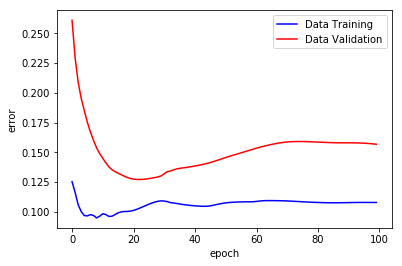

In [9]:
#Visualisations
import matplotlib.pyplot as plt

plt.plot((total_error_train3), color="blue")
plt.plot(total_error_val3, color= "red")
plt.legend(["Data Training", "Data Validation"])
plt.ylabel('error')
plt.xlabel('epoch')

plt.show()